In [5]:
from copy import deepcopy
import numpy as np
import pandas as pd
import random

import matplotlib.pyplot as plt

from keras.layers import Input, Dense
from keras.models import Model

# Import modules from libs/ directory
from libs.pconv_layer import PConv2D
from libs.util import random_mask

%matplotlib inline
%load_ext autoreload
%autoreload 2
plt.rcParams['figure.figsize'] = (9.0, 9.0) # 设置figure_size尺寸

from matplotlib.font_manager import FontProperties
font = FontProperties(fname=r"c:\windows\fonts\simsun.ttc")


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
matrix_df = pd.read_csv('./data/trafficV201306_M.csv', index_col=0, parse_dates=True)
matrix_df.shape

(2880, 1024)

8.0


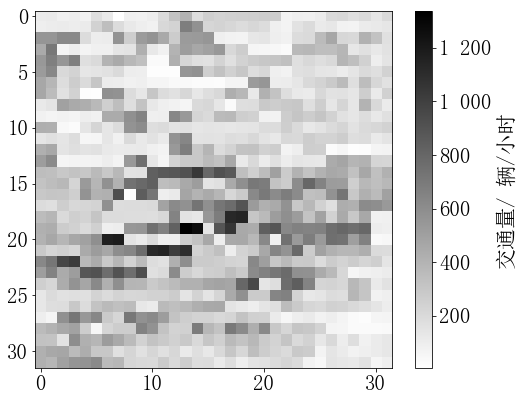

In [50]:
num = 96*0+32#random.randint(0, matrix_df.shape[0])
pic_matrix = matrix_df.iloc[num].values.reshape(32, 32, 1)
# pic_matrix = (pic_matrix - pic_matrix.min())/(pic_matrix.max() - pic_matrix.min())*255
print((num%96)*15/60)
from pylab import mpl
# plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['font.sans-serif'] = ['SimSun-ExtB']  #用simhei 字体显示中文
mpl.rcParams['font.sans-serif'] = ['SimSun-ExtB']

# plt.imshow(pic_matrix[:,:,0], cmap='gray')
fig, axe = plt.subplots(1, 1, figsize=(8, 8))
img = axe.imshow(pic_matrix[:,:,0], cmap ='binary')
cbar = fig.colorbar(img, shrink=0.82)
cbar.set_label('交通量/ 辆/小时', FontProperties=font, size=21)  
cbar.set_ticks([200, 400,600,800,1000,1200 ])
cbar.set_ticklabels(('200', '400','600','800','1 000','1 200'))

plt.rcParams.update({'font.size': 21})
plt.savefig('6.3_8点交通矩阵_黑白.jpg', dpi=300)

20.0


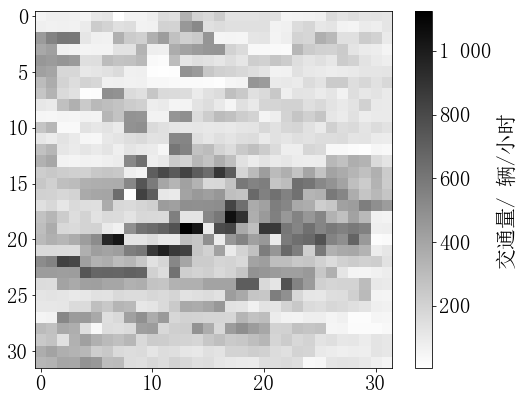

In [48]:
num = 96*0+80#random.randint(0, matrix_df.shape[0])
pic_matrix = matrix_df.iloc[num].values.reshape(32, 32, 1)
# pic_matrix = (pic_matrix - pic_matrix.min())/(pic_matrix.max() - pic_matrix.min())*255
print((num%96)*15/60)
from pylab import mpl
# plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['font.sans-serif'] = ['SimSun-ExtB']  #用simhei 字体显示中文
mpl.rcParams['font.sans-serif'] = ['SimSun-ExtB']

# plt.imshow(pic_matrix[:,:,0], cmap='gray')
fig, axe = plt.subplots(1, 1, figsize=(8, 8))
img = axe.imshow(pic_matrix[:,:,0], cmap ='binary')
cbar = fig.colorbar(img, shrink=0.82)
cbar.set_label('交通量/ 辆/小时', FontProperties=font, size=21)  
cbar.set_ticks([200, 400,600,800,1000])
cbar.set_ticklabels(('200', '400','600','800','1 000'))

plt.rcParams.update({'font.size': 21})
plt.savefig('6.3_20点交通矩阵_黑白.jpg', dpi=300)

In [19]:
dir(cbar)

['_A',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_add_solids',
 '_boundaries',
 '_central_N',
 '_config_axes',
 '_edges',
 '_extend_lower',
 '_extend_upper',
 '_extended_N',
 '_find_range',
 '_get_extension_lengths',
 '_inside',
 '_label',
 '_labelkw',
 '_locate',
 '_mesh',
 '_outline',
 '_patch_ax',
 '_process_values',
 '_proportional_y',
 '_set_label',
 '_slice_dict',
 '_tick_data_values',
 '_ticker',
 '_uniform_y',
 '_values',
 '_y',
 'add_checker',
 'add_lines',
 'alpha',
 'autoscale',
 'autoscale_None',
 'ax',
 'boundaries',
 'callbacksSM',
 'changed',
 'check_update',
 'cmap',
 'colorbar',
 'config_axis',
 'dividers',
 'draw_all',
 'drawedges',
 'extend',


In [ ]:
# ??random_mask

In [ ]:
pic_shape = pic_matrix.shape
# Load mask
mask = random_mask(pic_shape[0], pic_shape[1], size=0.2)
# mask = random_mask(pic_shape[0], pic_shape[1], size=0.9, type='block', block_size=(15, 15))

# Image + mask
masked_img = deepcopy(pic_matrix)
# masked_img = (pic_matrix - pic_matrix.min())/(pic_matrix.max() - pic_matrix.min())*255

masked_img[mask==0] = np.min(masked_img)

# Show side by side
_, axes = plt.subplots(1, 3, figsize=(20, 5))
axes[0].imshow(pic_matrix[:,:,0])
axes[1].imshow(mask[:,:,0]*255, cmap ='gray')
axes[2].imshow(masked_img[:,:,0])

In [ ]:
pic_shape

In [ ]:
# Input images and masks
input_img = Input(shape=(pic_shape[0], pic_shape[1], pic_shape[2],))
input_mask = Input(shape=(pic_shape[0], pic_shape[1], pic_shape[2],))
output_img, output_mask1 = PConv2D(8, kernel_size=(3,3), strides=(2,2), padding='same')([input_img, input_mask])
output_img, output_mask2 = PConv2D(16, kernel_size=(3,3), strides=(2,2), padding='same')([output_img, output_mask1])
output_img, output_mask3 = PConv2D(32, kernel_size=(3,3), strides=(2,2), padding='same')([output_img, output_mask2])
# output_img, output_mask4 = PConv2D(64, kernel_size=(3,3), strides=(2,2))([output_img, output_mask3])

# Create model
model = Model(
    inputs=[input_img, input_mask], 
    outputs=[
        output_img, output_mask1, output_mask2, output_mask3
    ])
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

# Show summary of the model
# model.summary()

Check mask layer updates

In [ ]:
formatted_img = np.expand_dims(masked_img, axis=0)
formatted_mask = np.expand_dims(mask, axis=0)
print(f"Original Mask Shape: {formatted_mask.shape} - Max value in mask: {np.max(formatted_mask)}")

output_img, o1, o2, o3 = model.predict([formatted_img, formatted_mask])

In [ ]:
o3.shape

In [ ]:
_, axes = plt.subplots(1, 3, figsize=(20, 10))
axes[0].imshow(o1[0, :,:, 0], cmap = 'gray', vmin=0, vmax=1)
axes[1].imshow(o2[0, :,:, 0], cmap = 'gray', vmin=0, vmax=1)
axes[2].imshow(o3[0, :,:, 0], cmap = 'gray', vmin=0, vmax=1)

axes[0].set_title(f"Shape: {o1.shape}")
axes[1].set_title(f"Shape: {o2.shape}")
axes[2].set_title(f"Shape: {o3.shape}")
